Udacity－Deep Learning－L1: ML 2 DL

思考：softmax／logistic 的input output是什么？公式怎么就能分成几类的？

Quiz: Softmax
Note: Your softmax(x) function should return a NumPy array of the same shape as x.

Softmax

Poll的笔记 http://www.cnblogs.com/maybe2030/p/5678387.html
softmax函数的本质就是将一个KK维的任意实数向量压缩（映射）成另一个KK维的实数向量，其中向量中的每个元素取值都介于（0，1）之间。

logistic具体针对的是二分类问题，而softmax解决的是多分类问题，因此从这个角度也可以理解logistic函数是softmax函数的一个特例。可推导。UFLDL教程中的推导，http://ufldl.stanford.edu/wiki/index.php/Softmax%E5%9B%9E%E5%BD%92

softmax建模使用的分布是多项式分布，而logistic则基于伯努利分布

softmax回归进行的多分类，类与类之间是互斥的，即一个输入只能被归为一类；

多个logistic回归进行多分类，输出的类别并不是互斥的，即"苹果"这个词语既属于"水果"类也属于"3C"类别。


https://www.zhihu.com/question/23765351
想用假设函数针对每一个类别j估算出概率值
代价函数为：

如果类别之间是互斥的，适合用softmax；如果类别之间允许重叠，应该选择k个logistic分类器。


[ 0.8360188   0.11314284  0.05083836]


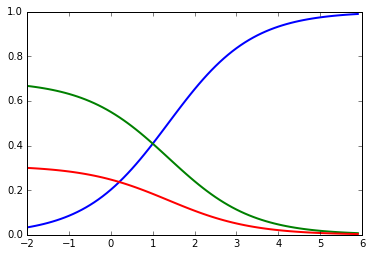

In [9]:
"""Softmax."""

scores = [3.0, 1.0, 0.2]

import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x)/np.sum(np.exp(x),axis=0)   # TODO: Compute and return softmax(x)

print(softmax(scores))



# Plot softmax curves
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

# np.vstack: 
# Take a sequence of arrays and stack them vertically to make a single array.

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()


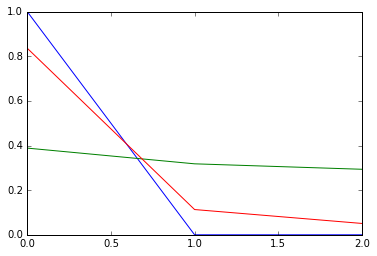

In [19]:
scores = np.array([3.0, 1.0, 0.2])
plt.plot(softmax(scores*10))
plt.plot(softmax(scores/10))
plt.plot(softmax(scores))


One-Hot Encoding
    One-Hot编码，又称为一位有效编码，主要是采用位状态寄存器来对个状态进行编码，每个状态都由他独立的寄存器位，并且在任意时候只有一位有效。
   https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science
   
   

cross entropy
http://www.cse.unsw.edu.au/~billw/cs9444/crossentropy.html
The cross-entropy measure has been used as an alternative to squared error. 
 can be used as an error measure when a network's outputs can be thought of as representing independent hypotheses 
 cross-entropy - indicates the distance between what the network believes this distribution should be, and what the teacher says it should be. 
 
 Why You Should Use Cross-Entropy Error Instead Of Classification Error Or Mean Squared Error For Neural Network Classifier Training
 https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/
 
 When using a neural network to perform classification and prediction, it is usually better to use cross-entropy error than classification error
 
  average cross-entropy error (ACE) 
MSE isn’t a hideously bad approach but if you think about how MSE is computed you’ll see that, compared to ACE, MSE gives too much emphasis to the incorrect outputs. 


After training, to get an estimate of the effectiveness of the neural network, classification error is usually preferable to MSE or ACE. The idea is that classification error is ultimately what you’re interested in.

To summarize, for a neural network classifier, during training you can use mean squared error or average cross-entropy error, and average cross-entropy error is considered slightly better. If you are using back-propagation, the choice of MSE or ACE affects the computation of the gradient. After training, to estimate the effectiveness of the neural network it’s better to use classification error.

In [22]:
# Numerical Stability

a = 1000000000
for i in range(1000000):
    a = a + 1e-6
print a-1000000000

0.953674316406
